In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="darkgrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

dtypes = {'id': 'int32', 
'titulo': 'object', 
'descripcion': 'object', 
'tipodepropiedad': 'category', 
'direccion': 'object', 
'ciudad': 'object', 
'provincia': 'category', 
'antiguedad': 'float16', 
'habitaciones': 'float16', 
'garages': 'float16', 
'banos': 'float16', 
'metroscubiertos': 'float16', 
'metrostotales': 'float16', 
'idzona': 'float64', 
'lat': 'float64', 
'lng': 'float64', 
'gimnasio': 'float16', 
'usosmultiples': 'float16', 
'piscina': 'float16', 
'escuelascercanas': 'float16', 
'centroscomercialescercanos': 'float16', 
'precio': 'float32', }
#parse_dates = ['fecha'] CONSUME MAS MEMORIA QUE EL TIPO OBJECT. Conviene convertirlo luego de subido el csv.


train = pd.read_csv('C:/Users/Alan Camussi/Desktop/train.csv', dtype = dtypes, low_memory=False, error_bad_lines = False)

In [2]:
train['precio_metro_usd'] = (train['precio']/train['metrostotales']) * 0.051
train_gym = train.loc[(train['gimnasio'] == 1)]
train_gym_prov = train_gym.groupby('provincia').agg({'id':'count'})
train_gym_prov = train_gym_prov.reset_index()
train_gym_prov = train_gym_prov[['provincia', 'id']].sort_values(by='id', ascending=False)
train_gym_prov = train_gym_prov.rename(columns={'id':'cantidad_propiedades'})
train_gym_prov

,provincia,cantidad_propiedades
8,Distrito Federal,4410
10,Edo. de México,3066
14,Jalisco,1344
18,Nuevo León,966
21,Querétaro,927
30,Yucatán,668
20,Puebla,657
22,Quintana Roo,518
12,Guerrero,457
16,Morelos,364


Text(0, 0.5, 'Provincia')

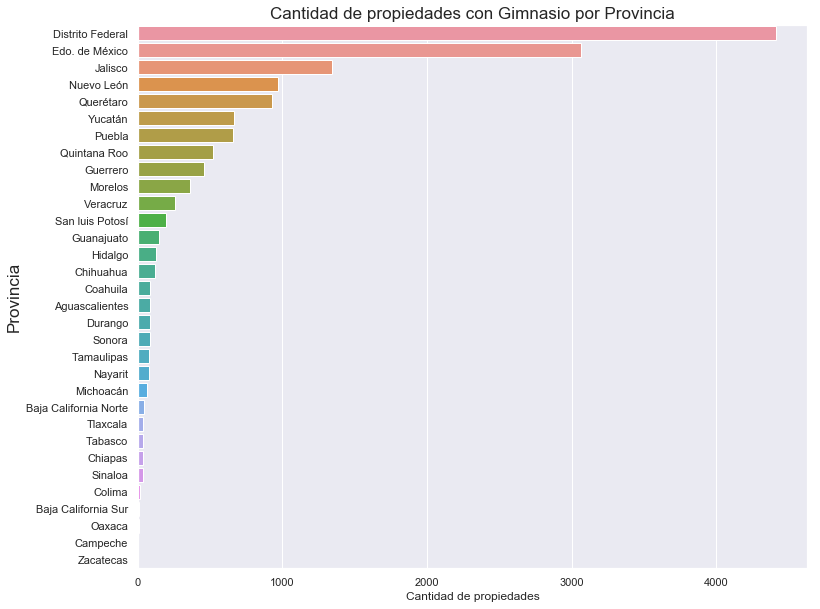

In [3]:
plt.rcParams['figure.figsize'] = (12, 10)
g = sns.barplot(x= train_gym_prov['cantidad_propiedades'], y=train_gym_prov['provincia'], orient='h', order = ['Distrito Federal', 
'Edo. de México', 
'Jalisco', 
'Nuevo León', 
'Querétaro', 
'Yucatán', 
'Puebla', 
'Quintana Roo', 
'Guerrero', 
'Morelos', 
'Veracruz', 
'San luis Potosí', 
'Guanajuato', 
'Hidalgo', 
'Chihuahua', 
'Coahuila', 
'Aguascalientes', 
'Durango', 
'Sonora', 
'Tamaulipas', 
'Nayarit', 
'Michoacán', 
'Baja California Norte', 
'Tlaxcala', 
'Tabasco', 
'Chiapas', 
'Sinaloa', 
'Colima', 
'Baja California Sur', 
'Oaxaca', 
'Campeche', 
'Zacatecas'])
g.set_title("Cantidad de propiedades con Gimnasio por Provincia", fontsize=17)
g.set_xlabel("Cantidad de propiedades", fontsize=12)
g.set_ylabel("Provincia", fontsize=17)

In [4]:
train_gym_tipo = train_gym.groupby('tipodepropiedad').agg({'id':'count'})
train_gym_tipo = train_gym_tipo.reset_index()
train_gym_tipo = train_gym_tipo[['tipodepropiedad', 'id']].sort_values(by='id', ascending=False)
train_gym_tipo = train_gym_tipo.rename(columns={'id':'cantidad_propiedades'})
#train_gym_tipo = train_gym_tipo.loc[(train_gym_tipo['cantidad_propiedades'] > 0)]
train_gym_tipo

,tipodepropiedad,cantidad_propiedades
0,Apartamento,7591
2,Casa,6105
3,Casa en condominio,1262
5,Departamento Compartido,34
20,Terreno,1
16,Oficina comercial,1
14,Lote,0
22,Terreno industrial,0
21,Terreno comercial,0
19,Rancho,0


Text(0, 0.5, 'Tipo de propiedad')

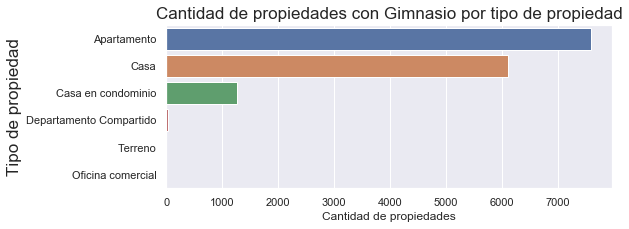

In [5]:
plt.rcParams['figure.figsize'] = (8, 3)
g = sns.barplot(x= train_gym_tipo['cantidad_propiedades'], y=train_gym_tipo['tipodepropiedad'], orient='h', order = ['Apartamento', 
'Casa', 
'Casa en condominio', 
'Departamento Compartido', 
'Terreno', 
'Oficina comercial'])
g.set_title("Cantidad de propiedades con Gimnasio por tipo de propiedad", fontsize=17)
g.set_xlabel("Cantidad de propiedades", fontsize=12)
g.set_ylabel("Tipo de propiedad", fontsize=17)

In [6]:
train_gym_apartamento = train.loc[(train['gimnasio'] == 1) & (train['tipodepropiedad'] == 'Apartamento')]
train_gym_apartamento_prov = train_gym_apartamento.groupby('provincia').agg({'id':'count'})
train_gym_apartamento_prov = train_gym_apartamento_prov.reset_index()
train_gym_apartamento_prov = train_gym_apartamento_prov[['provincia', 'id']].sort_values(by='id', ascending=False)
train_gym_apartamento_prov = train_gym_apartamento_prov.rename(columns={'id':'cantidad_propiedades'})
train_gym_apartamento_prov

,provincia,cantidad_propiedades
8,Distrito Federal,3764
10,Edo. de México,1858
12,Guerrero,409
14,Jalisco,399
22,Quintana Roo,294
18,Nuevo León,267
21,Querétaro,198
20,Puebla,155
16,Morelos,73
29,Veracruz,40


Text(0, 0.5, 'Provincia')

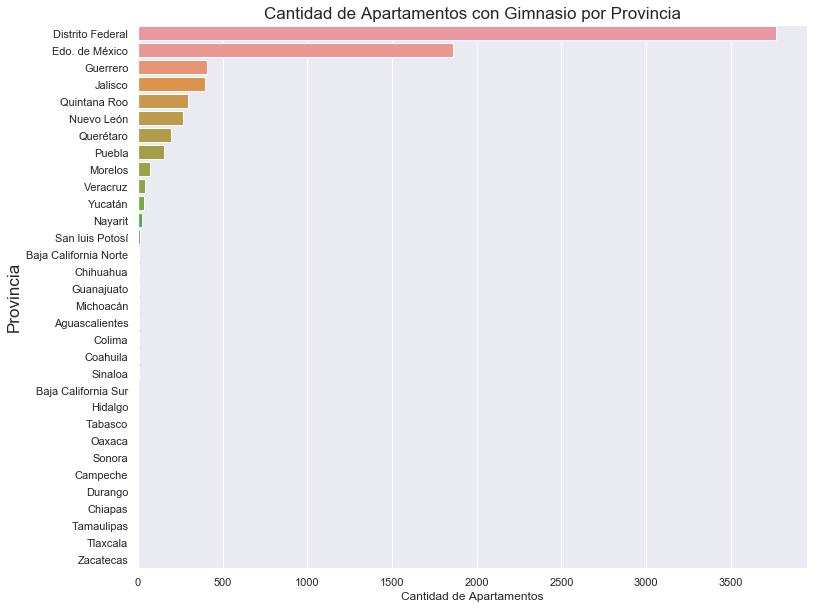

In [7]:
plt.rcParams['figure.figsize'] = (12, 10)
g = sns.barplot(x= train_gym_apartamento_prov['cantidad_propiedades'], y=train_gym_apartamento_prov['provincia'], orient='h', order = ['Distrito Federal', 
'Edo. de México', 
'Guerrero', 
'Jalisco', 
'Quintana Roo', 
'Nuevo León', 
'Querétaro', 
'Puebla', 
'Morelos', 
'Veracruz', 
'Yucatán', 
'Nayarit', 
'San luis Potosí', 
'Baja California Norte', 
'Chihuahua', 
'Guanajuato', 
'Michoacán', 
'Aguascalientes', 
'Colima', 
'Coahuila', 
'Sinaloa', 
'Baja California Sur', 
'Hidalgo', 
'Tabasco', 
'Oaxaca', 
'Sonora', 
'Campeche', 
'Durango', 
'Chiapas', 
'Tamaulipas', 
'Tlaxcala', 
'Zacatecas'])
g.set_title("Cantidad de Apartamentos con Gimnasio por Provincia", fontsize=17)
g.set_xlabel("Cantidad de Apartamentos", fontsize=12)
g.set_ylabel("Provincia", fontsize=17)

In [8]:
train_gym_casa = train.loc[(train['gimnasio'] == 1) & (train['tipodepropiedad'] == 'Casa')]
train_gym_casa_prov = train_gym_casa.groupby('provincia').agg({'id':'count'})
train_gym_casa_prov = train_gym_casa_prov.reset_index()
train_gym_casa_prov = train_gym_casa_prov[['provincia', 'id']].sort_values(by='id', ascending=False)
train_gym_casa_prov = train_gym_casa_prov.rename(columns={'id':'cantidad_propiedades'})
train_gym_casa_prov

,provincia,cantidad_propiedades
10,Edo. de México,896
14,Jalisco,700
18,Nuevo León,693
30,Yucatán,596
21,Querétaro,579
8,Distrito Federal,403
20,Puebla,390
16,Morelos,243
29,Veracruz,213
22,Quintana Roo,191


Text(0, 0.5, 'Provincia')

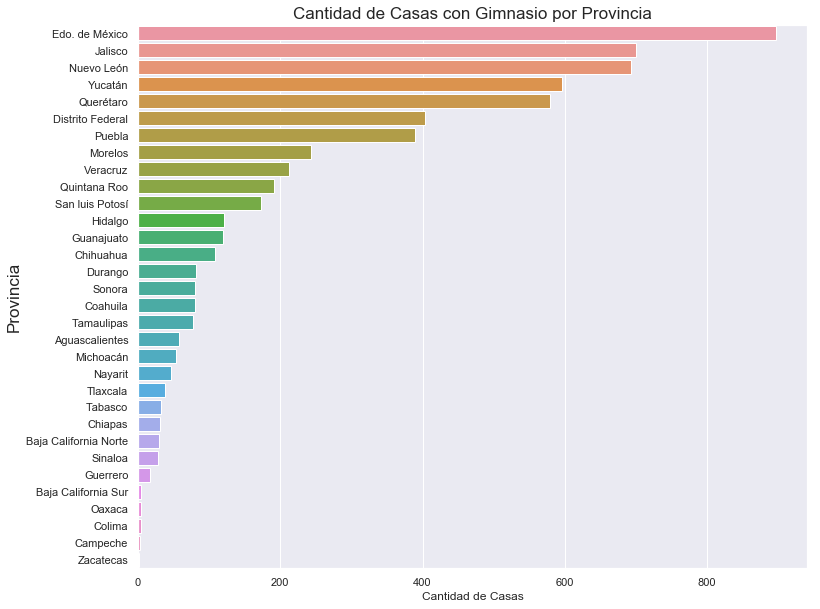

In [9]:
plt.rcParams['figure.figsize'] = (12, 10)
g = sns.barplot(x= train_gym_casa_prov['cantidad_propiedades'], y=train_gym_casa_prov['provincia'], orient='h', order = ['Edo. de México', 
'Jalisco', 
'Nuevo León', 
'Yucatán', 
'Querétaro', 
'Distrito Federal', 
'Puebla', 
'Morelos', 
'Veracruz', 
'Quintana Roo', 
'San luis Potosí', 
'Hidalgo', 
'Guanajuato', 
'Chihuahua', 
'Durango', 
'Sonora', 
'Coahuila', 
'Tamaulipas', 
'Aguascalientes', 
'Michoacán', 
'Nayarit', 
'Tlaxcala', 
'Tabasco', 
'Chiapas', 
'Baja California Norte', 
'Sinaloa', 
'Guerrero', 
'Baja California Sur', 
'Oaxaca', 
'Colima', 
'Campeche', 
'Zacatecas'])
g.set_title("Cantidad de Casas con Gimnasio por Provincia", fontsize=17)
g.set_xlabel("Cantidad de Casas", fontsize=12)
g.set_ylabel("Provincia", fontsize=17)

In [10]:
train_gym_apartamento_dfed = train.loc[(train['gimnasio'] == 1) & (train['tipodepropiedad'] == 'Apartamento') 
                                   & (train['provincia'] == 'Distrito Federal')]
train_gym_apartamento_dfed_ciudad = train_gym_apartamento_dfed.groupby('ciudad').agg({'id':'count'})
train_gym_apartamento_dfed_ciudad = train_gym_apartamento_dfed_ciudad.reset_index()
train_gym_apartamento_dfed_ciudad = train_gym_apartamento_dfed_ciudad[['ciudad', 'id']].sort_values(by='id', ascending=False)
train_gym_apartamento_dfed_ciudad = train_gym_apartamento_dfed_ciudad.rename(columns={'id':'cantidad_propiedades'})
train_gym_apartamento_dfed_ciudad

,ciudad,cantidad_propiedades
10,Miguel Hidalgo,854
0,Alvaro Obregón,844
4,Cuajimalpa de Morelos,624
2,Benito Juárez,589
5,Cuauhtémoc,389
3,Coyoacán,132
11,Tlalpan,93
1,Azcapotzalco,86
9,La Magdalena Contreras,34
6,Gustavo A. Madero,33


Text(0, 0.5, 'Ciudad')

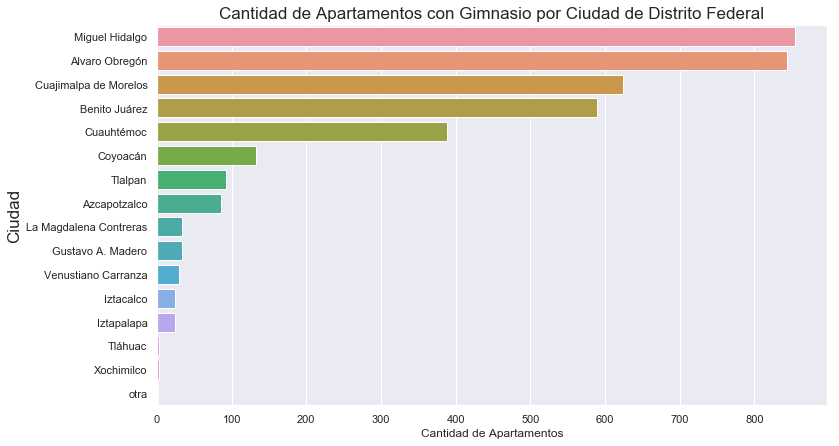

In [11]:
plt.rcParams['figure.figsize'] = (12, 7)
g = sns.barplot(x= train_gym_apartamento_dfed_ciudad['cantidad_propiedades'], y=train_gym_apartamento_dfed_ciudad['ciudad'], orient='h', order = [
'Miguel Hidalgo', 
'Alvaro Obregón', 
'Cuajimalpa de Morelos', 
'Benito Juárez', 
'Cuauhtémoc', 
'Coyoacán', 
'Tlalpan', 
'Azcapotzalco', 
'La Magdalena Contreras', 
'Gustavo A. Madero', 
'Venustiano Carranza', 
'Iztacalco', 
'Iztapalapa', 
'Tláhuac', 
'Xochimilco', 
'otra'
])
g.set_title("Cantidad de Apartamentos con Gimnasio por Ciudad de Distrito Federal", fontsize=17)
g.set_xlabel("Cantidad de Apartamentos", fontsize=12)
g.set_ylabel("Ciudad", fontsize=17)

In [32]:
# VARIACION DE PRECIOS PARA PROPIEDADES CON O SIN GYM POR PROVINCIA

train_sin_atributo = train.loc[(train['piscina'] == 0) & (train['escuelascercanas'] == 0)& 
                       (train['centroscomercialescercanos'] == 0) & (train['usosmultiples'] == 0) & 
                       (train['gimnasio'] == 0) & (train['metrostotales'].notnull())]

train_congym= train.loc[(train['piscina'] == 0) & (train['escuelascercanas'] == 0) & 
                       (train['centroscomercialescercanos'] == 0) & (train['usosmultiples'] == 0) & 
                       (train['gimnasio'] == 1) & (train['metrostotales'].notnull())]

train_sin_atributo = train_sin_atributo.groupby('provincia').agg({'precio_metro_usd':'mean'})
train_sin_atributo = train_sin_atributo.reset_index()
train_sin_atributo = train_sin_atributo[['provincia', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_sin_atributo = train_sin_atributo.rename(columns={'precio_metro_usd':'precio_metro_usd_prom'})

train_congym = train_congym.groupby('provincia').agg({'precio_metro_usd':'mean'})
train_congym = train_congym.reset_index()
train_congym = train_congym[['provincia', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_congym = train_congym.rename(columns={'precio_metro_usd':'precio_metro_usd_prom_gym'})

train_join_consingym = pd.merge(train_sin_atributo, train_congym, how = 'inner', on='provincia')
train_join_consingym['variacion'] = train_join_consingym['precio_metro_usd_prom'] - train_join_consingym['precio_metro_usd_prom_gym']

train_join_consingym.dropna(inplace = True)
train_join_consingym

#ESTO ES MEDIO INEXACTO PORQUE NO SE TIENEN EN CUENTA OTROS FACTORES COMO TIPO DE PROPIEDAD, ANTIGUEDAD, PROVINCIA, CIUDAD
#SE NOTA QUE ES INEXACTO YA QUE HAY VARIACIONES POSITIVAS Y NEGATIVAS

,provincia,precio_metro_usd_prom,precio_metro_usd_prom_gym,variacion
0,Distrito Federal,"1,184.91","1,681.66",-496.75
1,Tabasco,714.54,622.94,91.60
2,Guerrero,714.11,478.12,235.99
3,Edo. de México,711.35,"1,016.09",-304.74
4,Nuevo León,690.50,650.97,39.52
5,Puebla,679.01,866.78,-187.76
6,Jalisco,659.74,"1,090.70",-430.96
7,Quintana Roo,589.35,877.80,-288.45
9,Guanajuato,578.29,480.72,97.57
10,Veracruz,546.38,603.60,-57.22


In [13]:
# Promedio de variacion entre el precio por metro de una propiedad con gym y sin gym 
train_join_consingym['variacion'].mean()

-169.93869

Text(0.5, 1.0, 'Precio con Gimnasio vs Precio sin Gimnasio por Provincia (sin tener en cuenta antiguedad, habitaciones, etc)')

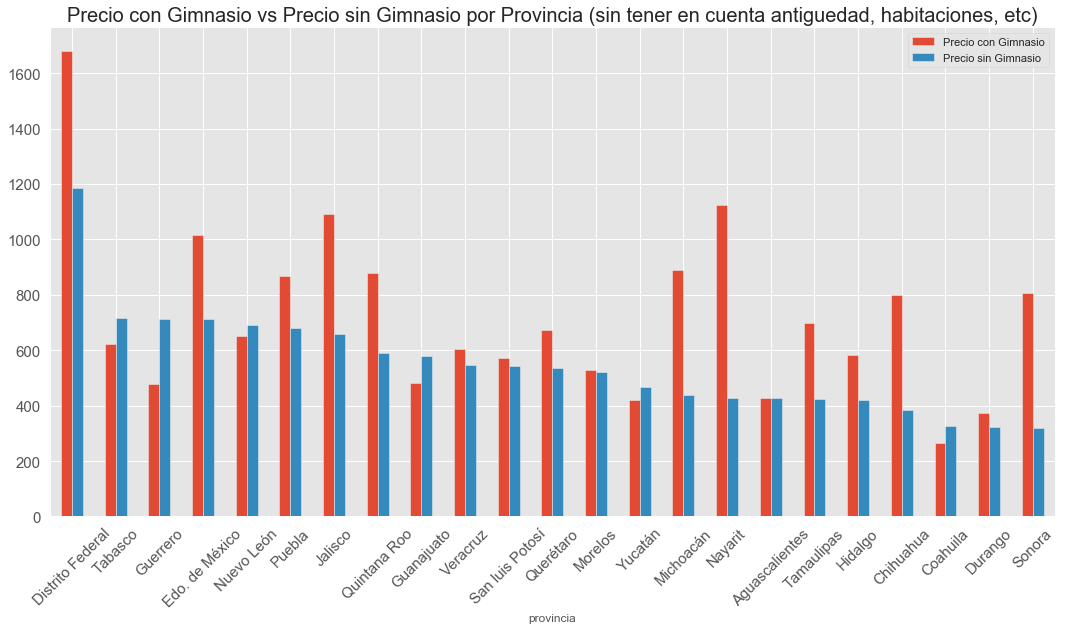

In [34]:
index = train_join_consingym['provincia']
precio_conGym = train_join_consingym['precio_metro_usd_prom_gym'].values.tolist()
precio_sinGym = train_join_consingym['precio_metro_usd_prom'].values.tolist()


df = pd.DataFrame({'Precio con Gimnasio': precio_conGym,
                   'Precio sin Gimnasio': precio_sinGym}, index=index)

plt.rcParams['figure.figsize'] = (18, 9)
plt.style.use('ggplot')
ax = df.plot.bar(rot=45, fontsize = 15)
ax.set_title('Precio con Gimnasio vs Precio sin Gimnasio por Provincia (sin tener en cuenta antiguedad, habitaciones, etc)',fontsize= 20)

In [35]:
# HAGO LO MISMO TENIENDO EN CUENTA EL TIPO DE PROPIEDAD YA QUE ANTES, EL PRECIO DE PROPIEDADES COMO EDIFICIOS, TERRENOS, ETC
# AFECTABA LA VARIACION

train_sin_atributo = train.loc[(train['piscina'] == 0) & (train['escuelascercanas'] == 0)& 
                       (train['centroscomercialescercanos'] == 0) & (train['usosmultiples'] == 0) & 
                       (train['gimnasio'] == 0) & (train['metrostotales'].notnull())
                             & (train['tipodepropiedad'] == 'Apartamento')]

train_congym= train.loc[(train['piscina'] == 0) & (train['escuelascercanas'] == 0) & 
                       (train['centroscomercialescercanos'] == 0) & (train['usosmultiples'] == 0) & 
                       (train['gimnasio'] == 1) & (train['metrostotales'].notnull()) & 
                        (train['tipodepropiedad'] == 'Apartamento')]

train_sin_atributo = train_sin_atributo.groupby('provincia').agg({'precio_metro_usd':'mean'})
train_sin_atributo = train_sin_atributo.reset_index()
train_sin_atributo = train_sin_atributo[['provincia', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_sin_atributo = train_sin_atributo.rename(columns={'precio_metro_usd':'precio_metro_usd_prom'})

train_congym = train_congym.groupby('provincia').agg({'precio_metro_usd':'mean'})
train_congym = train_congym.reset_index()
train_congym = train_congym[['provincia', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_congym = train_congym.rename(columns={'precio_metro_usd':'precio_metro_usd_prom_gym'})

train_join_consingym = pd.merge(train_sin_atributo, train_congym, how = 'inner', on='provincia')
train_join_consingym['variacion'] = train_join_consingym['precio_metro_usd_prom'] - train_join_consingym['precio_metro_usd_prom_gym']

train_join_consingym.dropna(inplace = True)
train_join_consingym

,provincia,precio_metro_usd_prom,precio_metro_usd_prom_gym,variacion
1,Distrito Federal,"1,294.14","1,807.18",-513.05
2,Nayarit,"1,215.79","1,123.73",92.06
3,Nuevo León,"1,099.31","1,363.14",-263.83
7,Jalisco,893.12,"1,347.62",-454.50
8,Edo. de México,882.63,"1,314.61",-431.98
10,Yucatán,839.05,819.64,19.41
11,Puebla,814.44,"1,215.58",-401.15
12,Chihuahua,745.76,"1,590.00",-844.24
13,Querétaro,700.28,756.73,-56.45
17,Morelos,647.70,768.92,-121.23


In [36]:
# Promedio de variacion entre el precio por metro de un Apartamento con gym y sin gym 
train_join_consingym['variacion'].mean()

-339.94467

Text(0.5, 1.0, 'Precio con Gimnasio vs Precio sin Gimnasio de Apartamento por Provincia (sin tener en cuenta antiguedad, habitaciones, etc)')

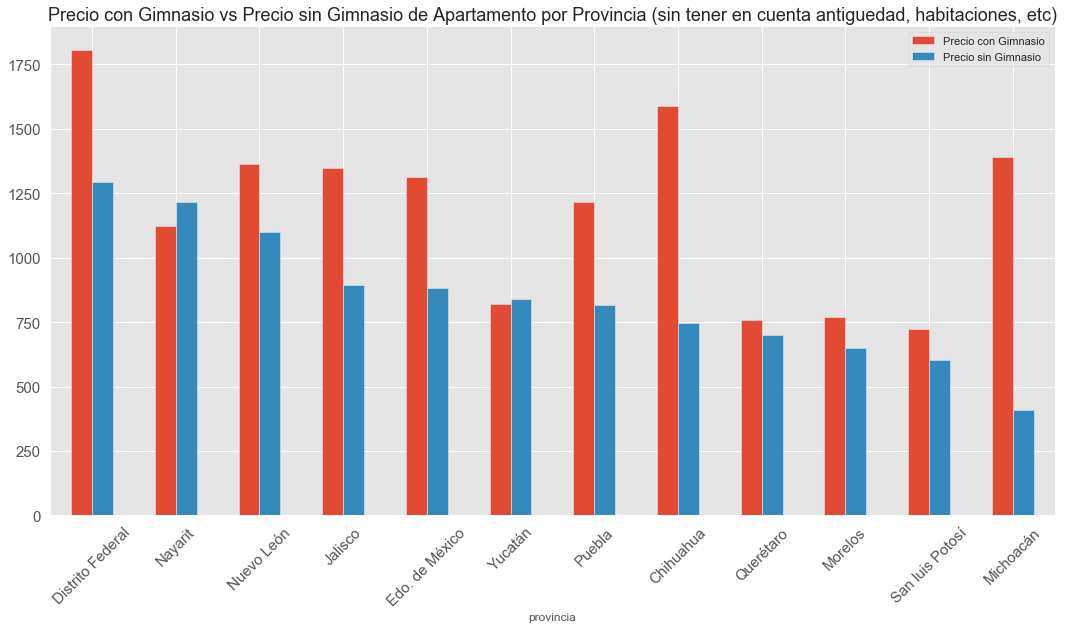

In [37]:
index = train_join_consingym['provincia']
precio_conGym = train_join_consingym['precio_metro_usd_prom_gym'].values.tolist()
precio_sinGym = train_join_consingym['precio_metro_usd_prom'].values.tolist()


df = pd.DataFrame({'Precio con Gimnasio': precio_conGym,
                   'Precio sin Gimnasio': precio_sinGym}, index=index)

plt.rcParams['figure.figsize'] = (18, 9)
plt.style.use('ggplot')
ax = df.plot.bar(rot=45, fontsize = 15)
ax.set_title('Precio con Gimnasio vs Precio sin Gimnasio de Apartamento por Provincia (sin tener en cuenta antiguedad, habitaciones, etc)',fontsize= 18)

In [38]:
train_gym_apartamento_dfed_hid = train.loc[(train['gimnasio'] == 1) & (train['tipodepropiedad'] == 'Apartamento') 
                                   & (train['provincia'] == 'Distrito Federal') & 
                                           (train['ciudad'] == 'Miguel Hidalgo')]

train_gym_apartamento_dfed_hid_ant = train_gym_apartamento_dfed_hid.groupby('antiguedad').agg({'id':'count'})
train_gym_apartamento_dfed_hid_ant = train_gym_apartamento_dfed_hid_ant.reset_index()
train_gym_apartamento_dfed_hid_ant = train_gym_apartamento_dfed_hid_ant[['antiguedad', 'id']].sort_values(by='id', ascending=False)

train_gym_apartamento_dfed_hid_ant = train_gym_apartamento_dfed_hid_ant.rename(columns={'id':'cantidad_propiedades'})
train_gym_apartamento_dfed_hid_ant.head()

,antiguedad,cantidad_propiedades
5,5.00,217
0,0.00,184
1,1.00,88
4,4.00,82
3,3.00,74


In [39]:
# TOMO 5 AÑOS DE ANTIGUEDAD YA QUE TENGO MAS INFO AHI
# AVERIGUO QUE PARAMETROS DE GARAGES, HABITACIONES Y BAÑOS ME CONVIENE TOMAR
train_gym_apartamento_dfed_hid = train.loc[(train['gimnasio'] == 1) & (train['tipodepropiedad'] == 'Apartamento') 
                                   & (train['provincia'] == 'Distrito Federal') & 
                                           (train['ciudad'] == 'Miguel Hidalgo') & 
                                           (train['antiguedad'] == 5)]

train_gym_apartamento_dfed_hid_ant = train_gym_apartamento_dfed_hid.groupby(['ciudad', 'habitaciones', 'banos', 
                                                                             'garages']).agg({'id':'count'})

train_gym_apartamento_dfed_hid_ant = train_gym_apartamento_dfed_hid_ant.rename(columns={'id':'cantidad_propiedades'})
train_gym_apartamento_dfed_hid_ant

cantidad_propiedades
ciudad         habitaciones banos garages                      
Miguel Hidalgo 1.00         1.00  1.00                       11
                                  2.00                        2
                            2.00  2.00                        4
               2.00         1.00  0.00                        1
                                  1.00                       10
                                  2.00                        4
                            2.00  1.00                       27
                                  2.00                       70
                                  3.00                        3
                            3.00  2.00                        4
               3.00         1.00  1.00                        3
                                  2.00                        1
                            2.00  1.00                        6
                                  2.00                       33
                                  3.00                        2
                            3.00  2.00                       17
                                  3.00                       11
               4.00         3.00  2.00                        1
                                  3.00                        1
                            4.00  3.00                        1

In [48]:
# FIJO LA PROVINCIA A DISTRITO FEDERAL YA QUE TENGO MAS DATOS AHI QUE EN OTRAS PROVINCIAS

train_sin_atributo = train.loc[(train['piscina'] == 0) & (train['escuelascercanas'] == 0) & 
                        (train['centroscomercialescercanos'] == 0) & (train['usosmultiples'] == 0) & 
                        (train['gimnasio'] == 0) & (train['metrostotales'].notnull()) & 
                        (train['provincia'] == 'Distrito Federal') & 
                        (train['antiguedad'] == 5) & (train['tipodepropiedad'] == 'Apartamento')]

train_congym= train.loc[(train['piscina'] == 0) & (train['escuelascercanas'] == 0) & 
                        (train['centroscomercialescercanos'] == 0) & (train['usosmultiples'] == 0) & 
                        (train['gimnasio'] == 1) & (train['metrostotales'].notnull()) & 
                        (train['provincia'] == 'Distrito Federal') &   (train['tipodepropiedad'] == 'Apartamento')]

train_sin_atributo = train_sin_atributo.groupby('ciudad').agg({'precio_metro_usd':'mean'})
train_sin_atributo = train_sin_atributo.reset_index()
train_sin_atributo = train_sin_atributo[['ciudad', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_sin_atributo = train_sin_atributo.rename(columns={'precio_metro_usd':'precio_metro_usd_prom'})

train_congym = train_congym.groupby('ciudad').agg({'precio_metro_usd':'mean'})
train_congym = train_congym.reset_index()
train_congym = train_congym[['ciudad', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_congym = train_congym.rename(columns={'precio_metro_usd':'precio_metro_usd_prom_gym'})

train_join_consingym = pd.merge(train_sin_atributo, train_congym, how = 'inner', on='ciudad')

train_join_consingym['variacion'] = train_join_consingym['precio_metro_usd_prom'] - train_join_consingym['precio_metro_usd_prom_gym']

train_join_consingym.dropna(inplace = True)
train_join_consingym

,ciudad,precio_metro_usd_prom,precio_metro_usd_prom_gym,variacion
0,Cuajimalpa de Morelos,"1,613.59","1,960.30",-346.70
1,Miguel Hidalgo,"1,461.30","2,028.87",-567.57
2,Benito Juárez,"1,324.69","1,821.48",-496.79
3,Cuauhtémoc,"1,307.59","1,530.99",-223.40
4,La Magdalena Contreras,"1,198.56","1,162.42",36.14
5,Alvaro Obregón,"1,101.42","1,926.15",-824.73
6,Tlalpan,996.56,"1,710.00",-713.44
7,Coyoacán,904.71,"1,567.11",-662.40
8,Azcapotzalco,791.48,"1,081.28",-289.81
9,Venustiano Carranza,674.93,912.38,-237.45


In [49]:
train_join_consingym['variacion'].mean()

-463.776

Text(0.5, 1.0, 'Precio con Gimnasio vs Precio sin Gimnasio de Apartamento por Ciudad de DF (sin tener en cuenta antiguedad, habitaciones, etc)')

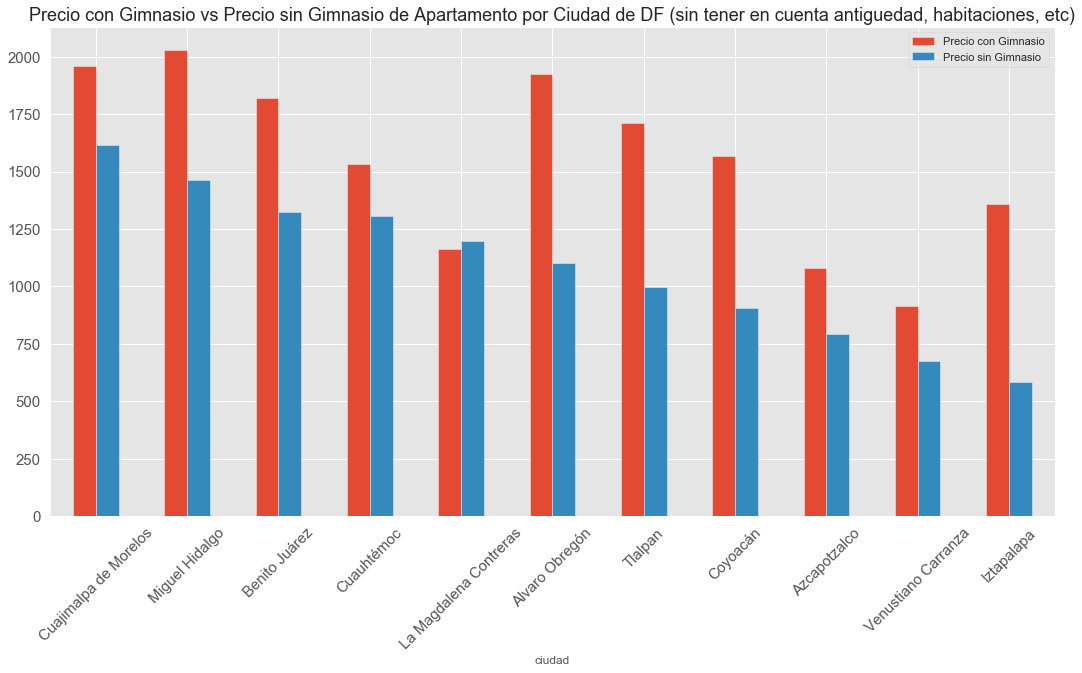

In [50]:
index = train_join_consingym['ciudad']
precio_conGym = train_join_consingym['precio_metro_usd_prom_gym'].values.tolist()
precio_sinGym = train_join_consingym['precio_metro_usd_prom'].values.tolist()

df = pd.DataFrame({'Precio con Gimnasio': precio_conGym,
                   'Precio sin Gimnasio': precio_sinGym}, index=index)

plt.rcParams['figure.figsize'] = (18, 9)
plt.style.use('ggplot')
ax = df.plot.bar(rot=45, fontsize = 15)
ax.set_title('Precio con Gimnasio vs Precio sin Gimnasio de Apartamento por Ciudad de DF (sin tener en cuenta antiguedad, habitaciones, etc)',fontsize= 18)

In [51]:
# ENTONCES COMO ENCUENTRO MAS INFO, TOMO ANTIGUEDAD = 5, HABITACIONES = 2, BAÑOS = 2, GARAGES = 2

train_sin_atributo = train.loc[(train['piscina'] == 0) & (train['escuelascercanas'] == 0) & 
                        (train['centroscomercialescercanos'] == 0) & (train['usosmultiples'] == 0) & 
                        (train['gimnasio'] == 0) & (train['metrostotales'].notnull()) & 
                        (train['provincia'] == 'Distrito Federal') & 
                        (train['antiguedad'] == 5) & (train['tipodepropiedad'] == 'Apartamento') &
                        (train['garages'] == 2)& 
                        (train['banos'] == 2) & 
                        (train['habitaciones'] == 2)]

train_congym= train.loc[(train['piscina'] == 0) & (train['escuelascercanas'] == 0) & 
                        (train['centroscomercialescercanos'] == 0) & (train['usosmultiples'] == 0) & 
                        (train['gimnasio'] == 1) & (train['metrostotales'].notnull()) & 
                        (train['provincia'] == 'Distrito Federal') &   (train['tipodepropiedad'] == 'Apartamento')  &
                        (train['antiguedad'] == 5) & 
                        (train['garages'] == 2)& 
                        (train['banos'] == 2) & 
                        (train['habitaciones'] == 2)]

train_sin_atributo = train_sin_atributo.groupby('ciudad').agg({'precio_metro_usd':'mean'})
train_sin_atributo = train_sin_atributo.reset_index()
train_sin_atributo = train_sin_atributo[['ciudad', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_sin_atributo = train_sin_atributo.rename(columns={'precio_metro_usd':'precio_metro_usd_prom'})

train_congym = train_congym.groupby('ciudad').agg({'precio_metro_usd':'mean'})
train_congym = train_congym.reset_index()
train_congym = train_congym[['ciudad', 'precio_metro_usd']].sort_values(by='precio_metro_usd', ascending=False)
train_congym = train_congym.rename(columns={'precio_metro_usd':'precio_metro_usd_prom_gym'})

train_join_consingym = pd.merge(train_sin_atributo, train_congym, how = 'inner', on='ciudad')

train_join_consingym['variacion'] = train_join_consingym['precio_metro_usd_prom'] - train_join_consingym['precio_metro_usd_prom_gym']

train_join_consingym.dropna(inplace = True)
train_join_consingym['precio_metro_usd_prom'] = train_join_consingym['precio_metro_usd_prom'].astype(int)
train_join_consingym['precio_metro_usd_prom_gym'] = train_join_consingym['precio_metro_usd_prom_gym'].astype(int)
train_join_consingym

,ciudad,precio_metro_usd_prom,precio_metro_usd_prom_gym,variacion
0,Miguel Hidalgo,2342,2968,-625.81
1,Benito Juárez,1538,1586,-48.60
2,Alvaro Obregón,1388,1754,-366.20


In [52]:
# Promedio de variacion entre el precio por metro de un Apartamento en ciudades de Distrito Federal con gym y sin gym 
# y con antiguedad de 5 años, 2 garages, 2 baños y 2 habitaciones
train_join_consingym['variacion'].mean()

-346.8716

Text(0.5, 1.0, 'Precio con Gimnasio vs Precio sin Gimnasio de Apartamento por Ciudad de DF (con 5 años de antiguedad, 2 haitaciones, 2 garages y 2 baños)')

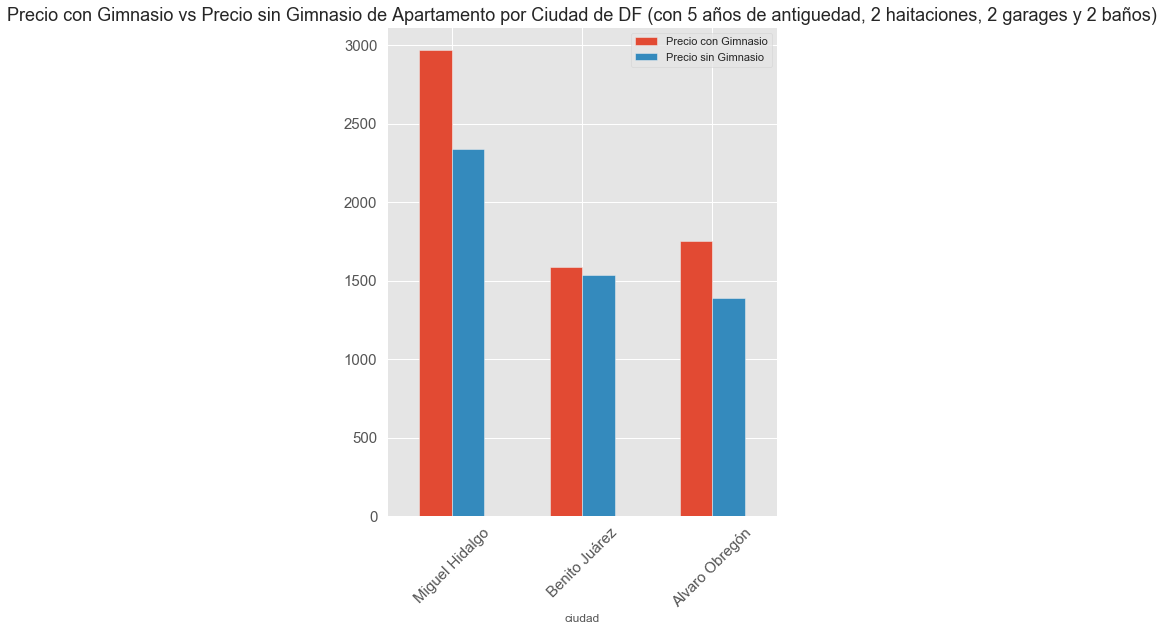

In [62]:
index = train_join_consingym['ciudad']
precio_conGym = train_join_consingym['precio_metro_usd_prom_gym'].values.tolist()
precio_sinGym = train_join_consingym['precio_metro_usd_prom'].values.tolist()

df = pd.DataFrame({'Precio con Gimnasio': precio_conGym,
                   'Precio sin Gimnasio': precio_sinGym}, index=index)

plt.rcParams['figure.figsize'] = (7, 9)
plt.style.use('ggplot')
ax = df.plot.bar(rot=45, fontsize = 15)
ax.set_title('Precio con Gimnasio vs Precio sin Gimnasio de Apartamento por Ciudad de DF (con 5 años de antiguedad, 2 haitaciones, 2 garages y 2 baños)',fontsize= 18)